# **US Medical Insurance Costs**
This project finds trends in US patient medical data. 


In [1]:
#Import the data, organize into a list
import csv
with open('Insurance.csv', newline='') as insurance_csv:
    fieldnames = ['age','sex','bmi','children','smoker','region','charges']
    medical_data_csv = csv.DictReader(insurance_csv)
    medical_data_list = list()
    for row in medical_data_csv:
        medical_data_dict = dict()
        for name in fieldnames:
            medical_data_dict[name]= row[name]
        medical_data_list.append(medical_data_dict)

for person in medical_data_list:
    print(person)

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
{'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}
{'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}
{'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}
{'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}
{'age': '31', 'sex': 'female', 'bmi': '25.74', 'children': '0', 'smoker': 'no', 'region': 'southeast', 'charges': '3756.6216'}
{'age': '46', 'sex': 'female', 'bmi': '33.44', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '8240.5896'}
{'age': '37', 'sex': 'female', 'bmi': '27.74', 'children': '3', 'smoker': 'no', 'region': 'northwest', 'charges': '7281.

In [54]:
def avg(summed_numbers, divisor):
    return summed_numbers / divisor

def currency(float_number):
    #1,342.1100
    rounded = round (float_number,2)
    #1342.11
    string = str(rounded)
    #'1342.11'
    #'1,234,767.00'
    length = len(string)
    #7
    #I need commas at [1]
    new_string = ''
    if length >= 7 and length < 10:
        new_string = "$" + string[:(length - 6)]  + "," + string[(length-6):]
    elif length >= 10:
        new_string = "$" + string[:(length - 9)] + "," + string[(length - 9):(length - 6)] + "," + string[(length - 6):]
    return new_string



In [10]:
#Find the average age of the patients in data set
def average_age(data_list):
    age = 0
    count = len(data_list)
    for person in data_list:
        age += int(person['age'])    
    return print("The average age of a person in this data set is " +  str(round(avg(age, count), 2)) + " years.")
    

average_age(medical_data_list)

The average age of a person in this data set is 39.21 years.


In [5]:
#Find where most individuals are from
def count_location(data_list):
    locations = {}
    for row in data_list:
        if row['region'] not in locations:
            locations[row['region']] = 1
        else:
            locations[row['region']] +=1
    top_region = ''
    top_amount = 0
    for location in locations:
        if locations[location] > top_amount:
            top_amount = locations[location]
            top_region = location
        
    return print(f"The {top_region} is the most represented region on this list with {top_amount} individuals living in that area.")
        
count_location(medical_data_list)

The southeast is the most represented region on this list with 364 individuals living in that area.


In [51]:
#Find how much more the average smoker pays in insurance than the average non-smoker

def extra_costs_smokers(data_list):
    smoker_count = 0
    smoker_cost = 0
    non_smoker_count = 0
    non_smoker_cost = 0
    for row in data_list:
        if row['smoker'] == 'yes':
            smoker_count+= 1
            smoker_cost += float(row['charges'])
        elif row['smoker'] == 'no':
            non_smoker_count += 1
            non_smoker_cost += float(row['charges'])
    average_smoker_cost = avg(smoker_cost, smoker_count)
    average_non_smoker_cost = avg(non_smoker_cost, non_smoker_count)
    
    return print("The average smoker pays " + str(currency(average_smoker_cost - average_non_smoker_cost)) + " more for insurance than the average non-smoker.")
extra_costs_smokers(medical_data_list)

The average smoker pays $23,615.96 more for insurance than the average non-smoker.


In [53]:
#Find average age for someone with at least one child in the data set

def average_age_with_child (data_set):
    age = 0
    count = 0
    for person in data_set:
        if person['children'] != '0':
            age += int(person['age'])
            count += 1
    return print (str(round(avg(age,count),2)) + " is the average age of of a person with at least 1 child in this data set.")

average_age_with_child(medical_data_list)

39.78 is the average age of of a person with at least 1 child in this data set.


In [58]:
#Find average number of children men have vs. average number of children that women have

def men_vs_women_children (data_set):
    num_men = 0
    num_men_children = 0
    men_child_count = 0
    
    num_women = 0
    num_women_children = 0
    women_child_count = 0
    
    for person in data_set:
        if person['sex'] == 'male':
            num_men += 1
            if person['children'] != '0':
                num_men_children +=1
                men_child_count += int(person['children'])
        elif person['sex'] == 'female':
            num_women +=1
            if person['children'] != '0':
                num_women_children += 1
                women_child_count += int(person['children'])
                
    avg_men_children = "{0:.0f}%".format(avg(num_men_children, num_men) * 100)
    avg_women_children = "{0:.0f}%".format(avg(num_women_children, num_women) * 100)
    avg_num_children_men = round(avg(men_child_count, num_men_children),2)
    avg_num_children_women = round(avg(women_child_count, num_women_children),2)
    
    return print(f"{avg_men_children} of men and {avg_women_children} of women have children in this data set.", '\n\n',  f"Men with children have an average of {avg_num_children_men} children and women with children have an average of {avg_num_children_women} children." )            
            
men_vs_women_children(medical_data_list) 
            

58% of men and 56% of women have children in this data set. 

 Men with children have an average of 1.93 children and women with children have an average of 1.91 children.


In [60]:
#Answer if women or men pay more on average for health insurance
def avg_cost_comparison(data_set):
    costs_women = list()
    costs_men = list()
    for person in data_set:
        if person['sex'] =='female':
            costs_women.append(float(person['charges']))
        else:
            costs_men.append(float(person['charges']))
    avg_costs_women = round(avg(sum(costs_women),len(costs_women)),2)
    avg_costs_men = round(avg(sum(costs_men),len(costs_men)),2)
    return print(f"Women pay on average {currency(avg_costs_women)} and men pay on average {currency(avg_costs_men)} for health insurance. \n\n Men pay on average {currency(avg_costs_men-avg_costs_women)} more than women for health insurance.")

avg_cost_comparison(medical_data_list) 


Women pay on average $12,569.58 and men pay on average $13,956.75 for health insurance. 

 Men pay on average $1,387.17 more than women for health insurance.


In [80]:
#Find a line of best fit for predicting a woman's BMI based on her age

#Define the equation of the line
def get_y(m, x, b):
    y = m * x + b
    return y

#Add the data points into a list of tupules

women_ages_bmi = []
for person in medical_data_list:
    if person['sex'] == 'female':
        women_ages_bmi.append( ( int(person['age']), float(person['bmi']) ) )

        
#Calculate total error for a point on the line

def calc_error(m, b, point):
    x_point = point[0]
    y_point = point[1]
    return ( abs( get_y(m, x_point, b) - y_point )  )

#Create a function that sums the error of multiple points to calculate total error

def total_calc_error (m, b, datapoints):
    total_error = 0
    for point in datapoints:
        total_error += calc_error(m, b, point)
    return (total_error)

#Create a list of potential lines

m_list = [m * .01 for m in range(0, 400)]
b_list =  [ b * .1 for b in range (0, 400)]

#Test all possible line combinations and compare which has smallest error

least_error = float("inf")
best_m = 0
best_b = 0

for m in m_list:
    for b in b_list:
        tot_error = total_calc_error(m, b, women_ages_bmi)
        if tot_error < least_error:
            least_error = tot_error
            best_m = m
            best_b = b
            
print(f"The estimated line of best fit is y = {round(best_m,2)}x + {round(best_b,2)}")



The estimated line of best fit is y = 0.05x + 28.2


The actual line of best fit is y=0.04x+28.73


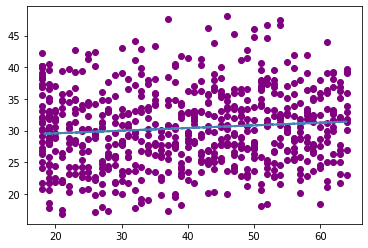

In [81]:
#Plot the poins and line of best fit 
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

for woman in women_ages_bmi:
    x.append (woman[0])
    y.append (woman[1])

new_x = np.array(x)
new_y = np.array(y)

a, b = np.polyfit(new_x, new_y, 1)
plt.scatter(new_x, new_y, color='purple')
plt.plot(new_x, a*new_x+b, color='steelblue', linestyle='--', linewidth=2)

print(f"The actual line of best fit is y={round(a,2)}x+{round(b,2)}")

In [ ]:
#Rank geographic regions by average BMI

def bmi_average(data_set):
    regions = {}
    
    for person in data_set:
        if person['region'] not in regions:
            regions[person['region']] = []
            regions[person['region']].append(float(person['bmi']))
        else:
            regions[person['region']].append(float(person['bmi']))
            
    regions_average = {}
    
    for region in regions:
        regions_average[region] = avg(sum(regions[region]), len(regions[region]))
    
    return dict(sorted(regions_average.items(), key=lambda item: item[1]))
    
bmi_average(medical_data_list)


